In [1]:
from koselleck import *

In [2]:
swas=get_word_abstractness_scores()

In [3]:
# def prdz(y,ystart=1710,yend=3000,ystep=40):
def prdz(y,ystart=1600,yend=3000,ystep=20):
    ln=None
    for n in range(ystart,yend,ystep):
        if ln is None: ln=n
        if y<n: return ln
        ln=n
        
prdz(1715)

1700

In [4]:
def get_neighb_data(ystart=1600,ystep=20):
    df=pd.read_pickle('data/data.neighborhoods.cache.v2.pkl')
    df['period_int']=df.period.apply(lambda x:int(x[:4]))
    df['period2']=df.period_int.apply(lambda y: prdz(y,ystart=ystart,ystep=ystep))
    #df['period']=df['period']
    return df.query('1720<=period_int<1900')


dfres=df=get_neighb_data()
# df.groupby('period').size()
df

,period,word2,rank,count,rankcount,rank2,period_int,period2
word,,,,,,,,
abandonment,1780-1790,insuperable,17.250000,4,0.219178,61.0,1780,1780
abandonment,1780-1790,exactions,2.000000,1,0.333333,27.0,1780,1780
abandonment,1780-1790,friary,3.000000,1,0.250000,49.0,1780,1780
abandonment,1780-1790,indemnification,34.000000,4,0.114286,137.5,1780,1780
abandonment,1780-1790,uncandid,5.000000,1,0.166667,100.5,1780,1780
...,...,...,...,...,...,...,...,...
zoology,1890-1900,mensuration,45.333333,3,0.064748,67.0,1890,1880
zoology,1890-1900,taxidermy,50.000000,1,0.019608,87.0,1890,1880
zoology,1890-1900,algebra,47.000000,1,0.020833,82.5,1890,1880


In [5]:
dfres.period_int.describe()

count    1.720881e+07
mean     1.795133e+03
std      5.040836e+01
min      1.720000e+03
25%      1.750000e+03
50%      1.790000e+03
75%      1.840000e+03
max      1.890000e+03
Name: period_int, dtype: float64

In [6]:
dfres.loc['progress']

,period,word2,rank,count,rankcount,rank2,period_int,period2
word,,,,,,,,
progress,1720-1730,rentals,1.96,25,8.445946,2.0,1720,1720
progress,1720-1730,rental,2.40,25,7.352941,3.0,1720,1720
progress,1720-1730,conditions,1.72,25,9.191176,1.0,1720,1720
progress,1720-1730,tacks,23.00,16,0.666667,22.0,1720,1720
progress,1720-1730,hempen,10.28,25,2.216312,5.0,1720,1720
...,...,...,...,...,...,...,...,...
progress,1890-1900,mutations,33.00,1,0.029412,74.0,1890,1880
progress,1890-1900,enterprise,48.00,1,0.020408,82.5,1890,1880
progress,1890-1900,colonising,47.00,1,0.020833,80.0,1890,1880


In [7]:
dfabs=get_dfpiv_abs().reset_index().melt(id_vars=['word'],value_name='abs')
dfabs['period2']=dfabs['period'].apply(prdz)
dfabs=dfabs.groupby(['word','period2']).mean().reset_index().dropna()
dfabs['word2']=dfabs['word']
okwords=set(dfabs.word)
dfabs

,word,period2,abs,word2
4,abandonment,1780,1.249668,abandonment
5,abandonment,1800,2.563577,abandonment
6,abandonment,1820,2.896265,abandonment
7,abandonment,1840,2.677320,abandonment
8,abandonment,1860,2.750508,abandonment
...,...,...,...,...
60005,zoology,1800,0.090642,zoology
60006,zoology,1820,-0.096660,zoology
60007,zoology,1840,0.144612,zoology
60008,zoology,1860,0.079964,zoology


In [8]:
def show(
        word='communication',
        min_periods=1,
        max_rank=25,
        max_rank1=5,
        width=8,
        height=6,
        save=False,
        vnum='v15-20y-5-v-25',
        showdata=False,
        year_min=1720,
        year_max=1900):
    w=word
    if w in set(dfres.index):
        wdf=dfres.loc[w].query(f'period2>={year_min}')
        wdf=wdf.query(f'period2<{year_max}')
        wdf=wdf[wdf['rank2']<=max_rank]
        wdf=wdf[wdf.word2.isin(okwords)]
        wdf=wdf[~wdf.word2.isin({'foil','slate','communicating','organisation'})]
        figdf=wdf
        words_ever_high=set(wdf[wdf['rank2']<=max_rank1].word2)
        figdf=figdf[figdf.word2.isin(words_ever_high)].groupby(['word2','period2']).mean().reset_index()
        wdfp=figdf.pivot('word2','period2','rankcount')
        figdf=wdfp.reset_index().melt(id_vars=['word2'],value_name='rankcount')
        figdf=figdf.groupby('word2').filter(lambda gdf: len(gdf.dropna())>=min_periods)
        figdf=pd.concat(
            grp.assign(rank3=(-1*grp['rankcount']).rank(method='first'))
            for i,grp in figdf.groupby('period2')
        )
        figdf=figdf[figdf.rank3<=max_rank]
        figdf=figdf.sort_values('rankcount')#.set_index('word2')
#         figdf=figdf.merge(dfabs,on=['word2','period2'])
#         figdf['conc']=figdf['abs']*-1
#         figdf['is_abs']=figdf['abs']>0
        figdf['period_str']=[
            f'{x}' #'-{x+40 if x+40<1900 else 1900}'
            for x in figdf['period2']
        ]
        figdf['word']=figdf['word2']  
        if showdata: display(figdf)
        fig=start_fig(
            figdf,
            x='period_str',
            y='rank3',
            label='word',
            group='word',
#             fill='conc',
            figure_size=(width,height)
        ) + p9.geom_line(size=0.5) + p9.scale_y_reverse()
        
        first_appearances=figdf.sort_values('period_str').drop_duplicates('word')
        other_appearances=figdf.loc[set(figdf.index) - set(first_appearances.index)]
        
        fig+=p9.geom_label(size=6.5,fill='#BBBBBB',fontweight='bold',data=first_appearances)
        fig+=p9.geom_label(size=6.5,data=other_appearances)
        
        fig+=p9.scale_fill_gradient(low='white',high='#999999')
        fig+=p9.scale_color_gradient(low='white',high='#999999')
        fig+=p9.labs(
            title=f'Changing associations of "{w}"',
            x='Date of semantic model',
            y=f'Proximity to "{w}" →',
            fill='Concreteness'
        )
        if save:
            ofn=f'fig.changing_simple.{w}.{vnum}.png'
            fig.save(f'figures/{ofn}')
            fig.save(f'/home/ryan/Markdown/Drafts/TheGreatAbstraction/figures/{ofn}')
        display(fig)
        return figdf
    else:
        print(f'!! {w} not in data')
    
    
res=interact_manual(show)

interactive(children=(Text(value='communication', description='word'), IntSlider(value=1, description='min_per…


## crisis
* Data from Sattelzeit binary model comparison
    * **Clean** result for semantic change according to the noise aware data
    * **70%** (**+Changed**) percentile for <u>local semantic change</u> (z=-0.03)
* Its neighborhoods:

| Vor der Sattelzeit (1700-1770) | Nach der Sattelzeit (1830-1900) |
| -------------- | -------------- |
| juncture (10), event (10), conclusion (10), period (10), <u>**-situation**</u> (10), catastrophe (10), <u>**-affair**</u> (10), <u>**-disease**</u> (10), agitation (10), calamity (10), <u>**-posture**</u> (10), time (10), moment (10), revolution (10), disorder (10), state (10), <u>**-slate**</u> (10), dissolution (10), <u>**-occurrence**</u> (10), <u>**-season**</u> (10), uncertainty (10), <u>**-melancholy**</u> (10), <u>**-brink**</u> (10), <u>**-helm**</u> (9), rupture (9), <u>**-consequence**</u> (9), negotiation (9), <u>**-malady**</u> (9), <u>**-disappointment**</u> (8), ministry (8), <u>**-anxiety**</u> (8), transaction (8), <u>**-maturity**</u> (8), <u>**-dilemma**</u> (7), commotion (7), administration (6), <u>**-delirium**</u> (6), <u>**-circumstance**</u> (6), <u>**-discussion**</u> (6), complication (5), distress (5), <u>**-impatience**</u> (5), congress (5), <u>**-scene**</u> (5), <u>**-eruption**</u> (5), <u>**-topic**</u> (5), perplexity (5), <u>**-incident**</u> (4), <u>**-undertaking**</u> (4), conflict (4), <u>**-suppression**</u> (3), nation (3), <u>**-apprehension**</u> (3), <u>**-tranquillity**</u> (3), danger (3), <u>**-stroke**</u> (3), <u>**-determination**</u> (3), <u>**-prelude**</u> (3), <u>**-symptom**</u> (3), <u>**-constitution**</u> (3), <u>**-sickness**</u> (3), <u>**-stake**</u> (3), <u>**-epidemic**</u> (3), struggle (2), <u>**-project**</u> (2), rebellion (2), discontent (2), <u>**-solicitude**</u> (2), enterprise (2), <u>**-extremity**</u> (2), disaster (2), <u>**-importance**</u> (2), <u>**-deliberation**</u> (2), <u>**-fatality**</u> (2), <u>**-completion**</u> (2), <u>**-interval**</u> (2), <u>**-step**</u> (2), <u>**-pulse**</u> (2) | catastrophe (10), disaster (10), juncture (10), agitation (10), calamity (10), event (10), conflict (10), revolution (10), <u>**+insurrection**</u> (10), moment (10), <u>**+termination**</u> (10), <u>**+contest**</u> (10), convulsion (10), dissolution (10), <u>**+peril**</u> (10), <u>**+epoch**</u> (10), struggle (10), rebellion (10), state (10), <u>**+panic**</u> (10), congress (10), <u>**+campaign**</u> (10), period (10), <u>**+policy**</u> (10), <u>**+invasion**</u> (10), <u>**+defeat**</u> (10), rupture (10), <u>**+reform**</u> (10), <u>**+decision**</u> (10), <u>**+mutiny**</u> (9), <u>**+anarchy**</u> (9), <u>**+revolt**</u> (9), administration (9), <u>**+coalition**</u> (8), conclusion (8), ministry (8), <u>**+war**</u> (8), consummation (7), negotiation (7), <u>**+disturbance**</u> (7), <u>**+emergency**</u> (7), <u>**+convention**</u> (6), time (6), commotion (5), uncertainty (5), <u>**+session**</u> (5), complication (5), danger (5), discontent (4), <u>**+extinction**</u> (4), <u>**+failure**</u> (4), <u>**+legislation**</u> (4), distress (4), nation (4), <u>**+democracy**</u> (3), <u>**+disaffection**</u> (3), <u>**+faction**</u> (3), <u>**+papacy**</u> (3), <u>**+conference**</u> (2), <u>**+menace**</u> (2), <u>**+annihilation**</u> (2), <u>**+humiliation**</u> (2), stagnation (2), <u>**+strife**</u> (2), <u>**+budget**</u> (2), enterprise (2), <u>**+government**</u> (2), <u>**+debate**</u> (2), <u>**+revival**</u> (2), <u>**+monarchy**</u> (2) |

* Its changes along key vectors categorized:
    

change mean_diff  mean1  mean2  mean_diff_t  \
word   vector                                                             
crisis Pleasure-Pain.HGI    Pain++      -2.1   0.39  -1.71        39.69   
       Polit-Acad.HGI       Polit+     +1.59   0.63   2.21       -31.82   
       Pos-Neg.HGI            Neg+     -1.25   0.59  -0.65        26.12   
       Virtue-Vice.HGI       Vice+     -1.19   0.51  -0.68        25.02   
       Qual-Quant.HGI       Quant+     -0.55  -0.34  -0.89        19.51   
       Freq.M                Freq+     +0.21  -0.29  -0.08       -35.53   
       Time-Space.HGI            +     +0.93   1.63   2.56       -11.09   
       Collective-Indiv.RH       +     +0.59   0.86   1.45        -6.76   
       Abs-Conc.Median           +     +0.53   1.16   1.69        -9.42   
       Interp-Desc.HGI           +     +0.46   0.98   1.44        -8.93   
       Human-Object.VG           +     +0.42   0.27   0.69        -7.67   
       Strong-Weak.HGI           +     +0.35   0.50   0.85        -7.20   
       Judg-Perc.HGI             -     -0.33  -1.11  -1.43         9.42   
       Active-Passive.HGI        -     -0.24  -0.82  -1.05         3.00   
       Ambig.NX                  +     +0.04   0.71   0.75        -0.63   
       Woman-Man.VG              +     +0.02  -0.47  -0.46        -0.20   

                            mean_diff_p   perc  
word   vector                                   
crisis Pleasure-Pain.HGI           0.00  96.04  
       Polit-Acad.HGI              0.00  92.57  
       Pos-Neg.HGI                 0.00  87.96  
       Virtue-Vice.HGI             0.00  86.72  
       Qual-Quant.HGI              0.00  78.32  
       Freq.M                      0.00  94.49  
       Time-Space.HGI              0.00  54.76  
       Collective-Indiv.RH         0.00  35.82  
       Abs-Conc.Median             0.00  48.02  
       Interp-Desc.HGI             0.00  45.84  
       Human-Object.VG             0.00  40.12  
       Strong-Weak.HGI             0.00  37.92  
       Judg-Perc.HGI               0.00  48.00  
       Active-Passive.HGI          0.02  16.40  
       Ambig.NX                    0.46   2.54  
       Woman-Man.VG                0.47   2.36

* These changes visualized:

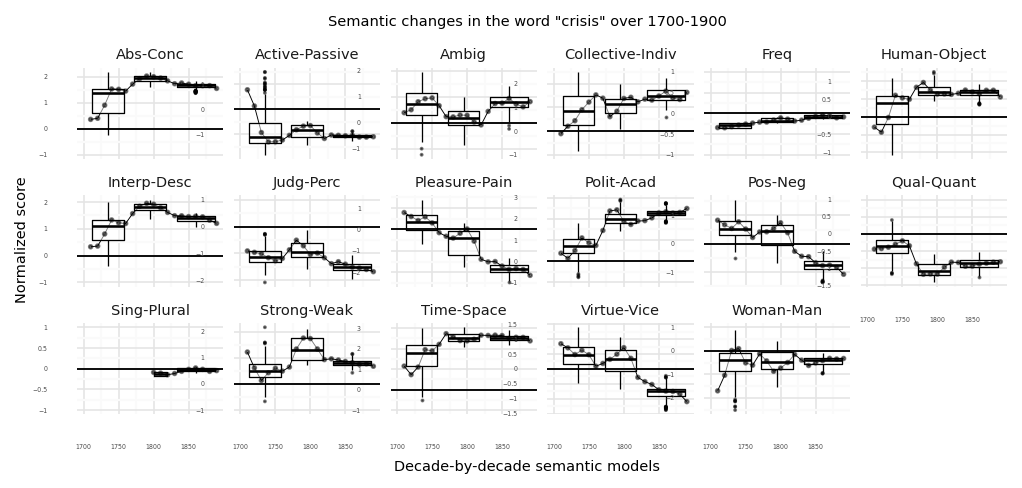

<ggplot: (8748522646577)>

In [9]:
plot_word_info('crisis')


## culture
* Data from Sattelzeit binary model comparison
    * **Clean** result for semantic change according to the noise aware data
    * **90%** (**+Changed**) percentile for <u>local semantic change</u> (z=0.78)
* Its neighborhoods:

| Vor der Sattelzeit (1700-1770) | Nach der Sattelzeit (1830-1900) |
| -------------- | -------------- |
| cultivation (10), <u>**-planting**</u> (10), <u>**-sowing**</u> (10), <u>**-vegetation**</u> (10), <u>**-soil**</u> (10), tillage (10), husbandry (10), <u>**-manure**</u> (10), <u>**-fruit**</u> (10), improvement (10), agriculture (10), <u>**-plant**</u> (10), gardening (10), <u>**-feeding**</u> (10), <u>**-vineyard**</u> (10), <u>**-flax**</u> (10), <u>**-foil**</u> (10), growth (10), <u>**-pasture**</u> (10), <u>**-climate**</u> (10), <u>**-crop**</u> (10), <u>**-cabbage**</u> (10), <u>**-clover**</u> (10), product (10), <u>**-grass**</u> (10), <u>**-botany**</u> (10), <u>**-drill**</u> (10), <u>**-peach**</u> (10), <u>**-brewing**</u> (10), farming (10), <u>**-shrub**</u> (9), <u>**-nourishment**</u> (9), <u>**-walnut**</u> (9), <u>**-breeding**</u> (8), <u>**-grain**</u> (8), <u>**-sap**</u> (8), <u>**-production**</u> (8), <u>**-cookery**</u> (8), <u>**-chemistry**</u> (8), <u>**-hemp**</u> (8), <u>**-harvest**</u> (7), <u>**-weaving**</u> (7), <u>**-geography**</u> (7), <u>**-beech**</u> (7), <u>**-vegetable**</u> (6), <u>**-manufacture**</u> (6), <u>**-seed**</u> (5), <u>**-cheapness**</u> (5), <u>**-dung**</u> (5), <u>**-fowl**</u> (4), fertility (4), <u>**-apple**</u> (4), <u>**-nursery**</u> (4), propagation (3), <u>**-structure**</u> (3), industry (3), <u>**-richness**</u> (3), <u>**-blossom**</u> (3), <u>**-millet**</u> (3), <u>**-timber**</u> (3), <u>**-weed**</u> (3), <u>**-population**</u> (3), <u>**-food**</u> (2), <u>**-watering**</u> (2), <u>**-plantation**</u> (2), <u>**-manufactory**</u> (2), <u>**-orchard**</u> (2) | cultivation (10), <u>**+education**</u> (10), growth (10), <u>**+advancement**</u> (10), industry (10), <u>**+refinement**</u> (10), <u>**+training**</u> (10), <u>**+learning**</u> (10), <u>**+science**</u> (10), product (10), <u>**+knowledge**</u> (10), <u>**+activity**</u> (10), <u>**+literature**</u> (10), <u>**+organization**</u> (10), <u>**+attainment**</u> (10), <u>**+teaching**</u> (10), <u>**+erudition**</u> (10), <u>**+philosophy**</u> (10), agriculture (10), <u>**+study**</u> (10), <u>**+morality**</u> (10), improvement (10), <u>**+instruction**</u> (10), <u>**+genius**</u> (10), usefulness (9), <u>**+proficiency**</u> (9), <u>**+religion**</u> (9), <u>**+intelligence**</u> (9), fertility (9), <u>**+talent**</u> (9), <u>**+intellect**</u> (8), <u>**+opulence**</u> (8), <u>**+thrift**</u> (8), <u>**+theology**</u> (8), husbandry (8), <u>**+acquisition**</u> (7), <u>**+utility**</u> (7), <u>**+piety**</u> (7), <u>**+art**</u> (7), <u>**+maturity**</u> (7), <u>**+faculty**</u> (7), <u>**+mathematics**</u> (7), <u>**+taste**</u> (7), tillage (7), <u>**+excellence**</u> (6), <u>**+discernment**</u> (6), <u>**+sobriety**</u> (5), <u>**+christianity**</u> (5), <u>**+emulation**</u> (4), <u>**+influence**</u> (4), <u>**+sensibility**</u> (4), <u>**+perception**</u> (4), <u>**+capacity**</u> (4), <u>**+perfection**</u> (4), <u>**+economy**</u> (4), <u>**+wealth**</u> (4), <u>**+benevolence**</u> (3), <u>**+universality**</u> (3), <u>**+expansion**</u> (3), <u>**+beneficence**</u> (3), <u>**+inferiority**</u> (3), <u>**+temperament**</u> (3), <u>**+subordination**</u> (2), <u>**+philology**</u> (2), farming (2), <u>**+accomplishment**</u> (2), <u>**+acuteness**</u> (2), <u>**+sufficiency**</u> (2), <u>**+polity**</u> (2) |

* Its changes along key vectors categorized:
    

change mean_diff  mean1  mean2  mean_diff_t  \
word    vector                                                                
culture Human-Object.VG       Object--     +1.45  -1.40   0.05       -30.92   
        Abs-Conc.Median          Abs++     +1.04   0.17   1.21       -24.12   
        Pos-Neg.HGI               Pos+     +1.82   1.48   3.30       -52.93   
        Virtue-Vice.HGI        Virtue+     +1.75   1.55   3.30       -55.78   
        Polit-Acad.HGI           Acad+     -1.15  -1.23  -2.38        29.07   
        Interp-Desc.HGI        Interp+     +1.14   0.77   1.91       -42.12   
        Strong-Weak.HGI        Strong+     +0.93   1.03   1.96       -37.54   
        Pleasure-Pain.HGI    Pleasure+     +0.91   1.46   2.37       -23.77   
        Time-Space.HGI               +     +0.77  -1.04  -0.26       -12.14   
        Woman-Man.VG                 +     +0.75  -0.33   0.43       -13.93   
        Ambig.NX                     +     +0.61  -0.22   0.39       -10.00   
        Active-Passive.HGI           -     -0.58   0.22  -0.35        13.58   
        Qual-Quant.HGI               -     -0.28  -0.64  -0.92         5.75   
        Collective-Indiv.RH          +     +0.26   2.13   2.39        -4.58   
        Freq.M                       +     +0.17  -0.23  -0.06       -10.43   
        Judg-Perc.HGI                +     +0.01  -0.35  -0.34        -0.14   

                             mean_diff_p   perc  
word    vector                                   
culture Human-Object.VG             0.00  91.95  
        Abs-Conc.Median             0.00  85.63  
        Pos-Neg.HGI                 0.00  98.51  
        Virtue-Vice.HGI             0.00  98.75  
        Polit-Acad.HGI              0.00  90.61  
        Interp-Desc.HGI             0.00  96.70  
        Strong-Weak.HGI             0.00  95.31  
        Pleasure-Pain.HGI           0.00  85.16  
        Time-Space.HGI              0.00  58.64  
        Woman-Man.VG                0.00  64.49  
        Ambig.NX                    0.00  50.47  
        Active-Passive.HGI          0.00  63.40  
        Qual-Quant.HGI              0.00  30.80  
        Collective-Indiv.RH         0.00  24.83  
        Freq.M                      0.00  52.20  
        Judg-Perc.HGI               0.49   2.04

* These changes visualized:

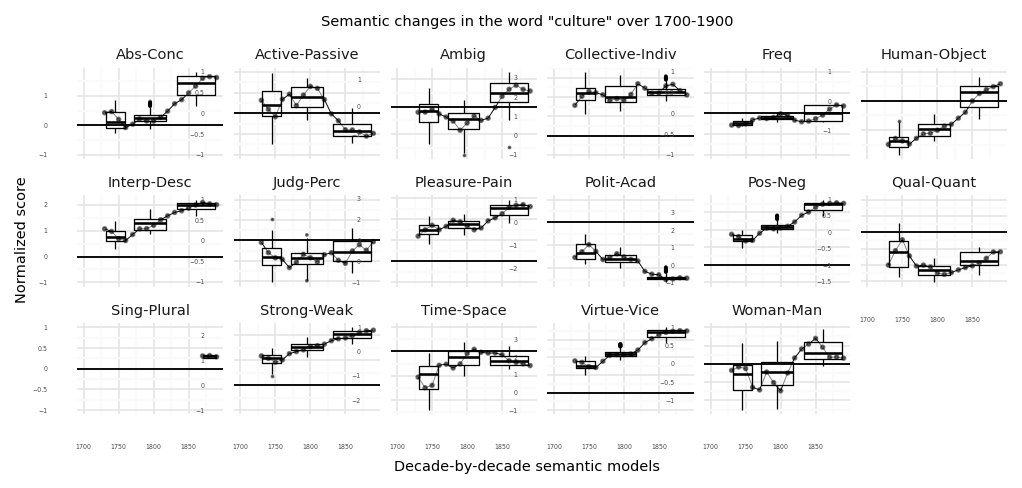

<ggplot: (8748475938033)>

In [10]:
plot_word_info('culture')